In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunCleaner import *
from random import uniform
import random

#given original point and vector from it, figure out properties of intersection wanted
#returns x2 greater (G) than or less (L) than x1
def finddirec(p1,v,intpos,intneg,vectpos,vectneg):
    x1 = p1[0]
    y1 = p1[1]
    z1 = p1[2]
    v1 = v[0]
    v2 = v[1]
    v3 = v[2]
    xpos = intpos[0]
    ypos = intpos[1]
    zpos = intpos[2]
    xneg = intneg[0]
    yneg = intneg[1]
    zneg = intneg[2]
    direc = [] 
    direcpos = []
    direcneg = []
    if v1 >=0:
        direc.append('G')
    if v1 < 0:
        direc.append('L')
    if v2 >=0:
        direc.append('G')
    if v2 < 0:
        direc.append('L')
    if v3 >=0:
        direc.append('G')
    if v3 < 0:
        direc.append('L')
    if xpos>=x1:
        direcpos.append('G')
    if xpos < x1:
        direcpos.append('L')
    if ypos>=y1:
        direcpos.append('G')
    if ypos < y1:
        direcpos.append('L')
    if zpos>=z1:
        direcpos.append('G')
    if zpos < z1:
        direcpos.append('L')
    if xneg>=x1:
        direcneg.append('G')
    if xneg < x1:
        direcneg.append('L')
    if yneg>=y1:
        direcneg.append('G')
    if yneg < y1:
        direcneg.append('L')
    if zneg>=z1:
        direcneg.append('G')
    if zneg < z1:
        direcneg.append('L')
    if direc == direcpos:
        return intpos, vectpos
    else:
        if direc == direcneg:
            return intneg, vectneg
        else: 
            return 'Error'

    
def REPCNi(coeffellipse,pli,v):
    Npos,Nneg = NormalP(pli,v,coeffellipse) #plane coefficients
    VectLNorm = N(v) #incident unit vector
    Npos = np.array([-x for x in Npos]) 
    Nneg = np.array([-x for x in Nneg])
    vectpos = VectLNorm - 2*N(Npos)*(np.dot(VectLNorm,N(Npos)))
    vectneg = VectLNorm - 2*N(Nneg)*(np.dot(VectLNorm,N(Nneg)))
    xint,yint,zint = ELI(pli,v,coeffellipse)
    intpos = [float(xint[0]),float(yint[0]),float(zint[0])] #array and points of intersection
    intneg = [float(xint[1]),float(yint[1]),float(zint[1])] #array and points of intersection
    GoodInt,GoodVect = finddirec(pli,v,intpos,intneg,vectpos,vectneg)
    return GoodInt, GoodVect

#uses 3d ellipses for range, ellipse origin for center of DESIRED range, 
def RSEPCNi(coeffellipse,pli,vectors, ranges, ellipseorigin):
    Vect = []
    pointints = []
    if len(pli) == 0:
        return [],[]
    if type(pli[0]) is int or type(pli[0]) is float: #assuming it is a source from one point
        for i in range (0,len(vectors)):
            Gpoint,Gvect = REPCNi(coeffellipse,pli,vectors[i])
            if SR3B(ranges, Gpoint[0],Gpoint[1],Gpoint[2], ellipseorigin) == True:
                pointints.append(Gpoint)
                Vect.append(Gvect)
    else:
        for i in range (0, len(pli)):
            Vi = vectors[i]
            Pli = pli[i] #(or pli/original points of lines)
            Gpoint,Gvect = REPCNi(coeffellipse,Pli,Vi)
            if SR3B(ranges, Gpoint[0],Gpoint[1],Gpoint[2], ellipseorigin) == True:
                pointints.append(Gpoint)
                Vect.append(Gvect)
    return pointints, Vect

In [2]:
originG = [0,0,0] # the global origin
thetG = [0,0,0] # rotation with respect to itself aka 0,0,0
origin10 = [-96.225,7.5,-40]
coeffellipse7 = [164.645,99.8,130.95] #for ellipse 7
thet10 = [0,.310422,-1.3106] #negative of thet7?

In [3]:
X11i,Y11i,Z11i,X12i,Y12i,Z12i = FTSEC(50,np.pi*2, coeffellipse7, 329.29, 'pos') #LOCAL
Xset11,Yset11,Zset11 = transformLG(X11i,Y11i,Z11i,origin10,thet10) #GLOBAL
Xset12,Yset12,Zset12 = transformLG(X12i,Y12i,Z12i,origin10,thet10) #GLOBAL
Ecenter = [-128.3,0,0]
X11,Y11,Z11 = SR10(32.07, Xset11,Yset11,Zset11, Ecenter) #SELECTED GLOBAL
X12,Y12,Z12 = SR10(32.07, Xset12,Yset12,Zset12, Ecenter) #SELECTED GLOBAL

In [4]:
center10,range10, = xrangeGL6(X11,Y11,Z11,X12,Y12,Z12,origin10,thet10)
X11t,Y11t,Z11t = SR103di(range10,X11i,Y11i,Z11i,center10)
X12t,Y12t,Z12t = SR103di(range10,X12i,Y12i,Z12i,center10)

In [5]:
#source 1 being reflected off of E10
originL = [0,0,0] #locally (or the global origin)
thetL = [0,0,0]

#creating the source (around the focus of E8) LOCALLY 
sourcepointorigin = [-130.95,0,0] #locally 
#sourcethet = [-np.pi/2,0,-.310422] #locally
sourcethet = [0,0,0]
sourcepoints = specsource(8,sourcepointorigin,sourcethet) #local

#source point and vector!
sourcep1, sv1 = FS(100,sourcepoints, sourcethet,origin10) #local
#Reflection off of E10
points10, vects10 = RSEPCNi(coeffellipse7,sourcep1,sv1, range10,center10) #local
#sourcep1[1]
#a,b = REPCNi(coeffellipse7,sourcep1[3],sv1[3])

pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot(X11i,Y11i,Z11i,linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)#LOCAL
pl3dsurf.plot(X12i,Y12i,Z12i,linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)#LOCAL
for i in range (0,len(points10)):
    x,y,z = ML(points10[i],vects10[i],80)
    pl.plot(x,y,z,color = 'red')
pl.show()
#OH MY GOD IT WORKS OH MY GOD IT WORKS. 

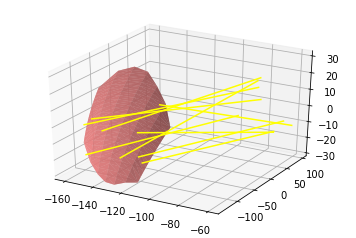

In [6]:
#ELLIPSE 10
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X11,Y11,Z11,linewidth = .2, antialiased=True, color = 'lightcoral',alpha=0.7)#GLOBAL
pl3dsurf.plot_trisurf(X12,Y12,Z12,linewidth = .2, antialiased=True, color = 'lightcoral',alpha=0.7)#GLOBAL
p10,v10 = RT(points10,vects10,thet10,origin10,thetG,originG) #GLOBAL
for i in range (0,len(p10)):
    x,y,z = ML(p10[i], v10[i], 200) #global
    pl3dsurf.plot(x,y,z, color = 'yellow')
pl.show()

In [7]:
origin8 = [-64.15,-120.501,0]
origin9 = [-64.15,120.501,0]
coeffellipse56 = [256.65,248.39,64.58]  #for ellipses 5&6
thet5 = [0,0,-.1164] 
thet6 = [0,0,.1164]
#ellipse 8&9
X9i,Y9i,Z9i,X10i,Y10i,Z10i = FTSEC(50,np.pi/8, coeffellipse56, 150, 'pos')
X9n,Y9n,Z9n,X10n,Y10n,Z10n = FTSEC(50,np.pi/8, coeffellipse56, 150, 'neg')

#ellipse 8
Xset9,Yset9,Zset9 = transformLG(X9i,Y9i,Z9i,origin8,thet6)
Xset10,Yset10,Zset10 = transformLG(X10i,Y10i,Z10i,origin8,thet6)

X9,Y9,Z9 = SR2(32.07, Xset9,Yset9,Zset9, origin8)
X10,Y10,Z10 = SR2(32.07, Xset10, Yset10, Zset10, origin8)

#ellipse 9
Xset9n,Yset9n,Zset9n = transformLG(X9n,Y9n,Z9n,origin9,thet5)
Xset10n,Yset10n,Zset10n = transformLG(X10n,Y10n,Z10n,origin9,thet5)

X9n,Y9n,Z9n = SR2(32.07, Xset9n,Yset9n,Zset9n, origin9)
X10n,Y10n,Z10n = SR2(32.07, Xset10n, Yset10n, Zset10n, origin9)

origin1 = [0,-128,0] #x,y (ellipse1)
origin2 = [64.15,-128,0] #x,y (ellipse2)
origin3 = [0,128,0] #x,y (ellipse3)
origin4 = [64.15,128,0] #x,y  (ellipse4)
coeffellipse = [263.9,256,64.15] #for center ellipses
thet = [0,0,0]
#center ellipses
X1,Y1,Z1,X2,Y2,Z2 = FTSEC(50,np.pi/8, coeffellipse, 64.15, 'pos')
X1n,Y1n,Z1n,X2n,Y2n,Z2n = FTSEC(50,np.pi/8, coeffellipse, 64.15, 'neg')

Xset1, Yset1, Zset1 = SR2(32.07, X1,Y1,Z1, originG)
Xset2, Yset2, Zset2 = SR2(32.07, X2, Y2, Z2, originG)
Xset1n, Yset1n, Zset1n = SR2(32.07, X1n,Y1n,Z1n, originG)
Xset2n, Yset2n, Zset2n = SR2(32.07, X2n, Y2n, Z2n, originG)


#ellipse 1
X1i,Y1i,Z1i = transformLG(Xset1,Yset1,Zset1,origin1,thet)
X2i,Y2i,Z2i = transformLG(Xset2,Yset2,Zset2,origin1,thet)

#ellipse 3
X1n,Y1n,Z1n = transformLG(Xset1n,Yset1n,Zset1n,origin3,thet)
X2n,Y2n,Z2n = transformLG(Xset2n,Yset2n,Zset2n,origin3,thet)

#ellipse 2
X3i,Y3i,Z3i = transformLG(Xset1,Yset1,Zset1,origin2,thet)
X4i,Y4i,Z4i = transformLG(Xset2,Yset2,Zset2,origin2,thet)

#ellipse 4
X3n,Y3n,Z3n = transformLG(Xset1n,Yset1n,Zset1n,origin4,thet)
X4n,Y4n,Z4n = transformLG(Xset2n,Yset2n,Zset2n,origin4,thet)

In [8]:
#for ellipse 8
center8,range8 = xrangeGL6(X9,Y9,Z9,X10,Y10,Z10,origin8,thet6)
print(range8)

[31.060606060606052, 3.4583030452713643, 31.630147497666766]


In [9]:
#retransform from LOCAL 10 to LOCAL 8
sp10,v10 = RT(points10, vects10,thet10,origin10,thet6,origin8)
points810,vects810 = RSEPCNi(coeffellipse56,sp10,v10,range8,center8)
print(sp10)

[[-49.1134282125252, -11.174554289430233, -12.08272240569768], [-80.307136431892715, 1.1651813201898362, -3.2790469256337929], [-45.176043498113813, 18.910992557514906, 16.725099662320311], [-53.904182822404536, -0.048897244296851293, 0.52607024368647615], [-97.871194944598273, 11.351009486682004, -3.7970892749524907], [-89.30404238092477, -8.2092260570561155, -18.680536899875666], [-61.731702597194804, -13.37188054721018, -14.80202433692844], [-92.258181195907625, 12.100049303980388, 0.69828930310508497], [-45.993576117870731, -12.83171371023152, -15.02506468331406]]


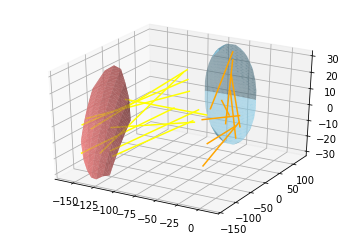

In [10]:
#plotting E10 and E8
pl3dsurf = pl.figure().gca(projection = '3d')
#E10
pl3dsurf.plot_trisurf(X11,Y11,Z11,linewidth = .2, antialiased=True, color = 'lightcoral',alpha=0.7)#GLOBAL
pl3dsurf.plot_trisurf(X12,Y12,Z12,linewidth = .2, antialiased=True, color = 'lightcoral',alpha=0.7)#GLOBAL
for i in range (0,len(p10)):
    x,y,z = ML(p10[i], v10[i], 200) #global
    pl3dsurf.plot(x,y,z, color = 'yellow')
#E8
pl3dsurf.plot_trisurf(X9,Y9,Z9, linewidth = .2, antialiased=True, color = 'skyblue',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X10,Y10,Z10, linewidth = .2, antialiased=True, color = 'skyblue',alpha=0.7) #GLOBAL

p810,v810 = RT(points810,vects810,thet6,origin8,thetG,originG)
for i in range (0,len(p810)):
    x,y,z = ML(p810[i], v810[i], 200)
    pl3dsurf.plot(x,y,z, color = 'Orange')
pl.show()

In [11]:
#reflection off of E3 from E8
center3,range3 = xrangeGL6(X1n,Y1n,Z1n,X2n,Y2n,Z2n,origin3,thet)
#transform from LOCAL E8 to LOCAL E3
sp8,v8 = RT(points810,vects810,thet6,origin8,thet,origin3)
points38,vects38 = RSEPCNi(coeffellipse,sp8,v8,range3,center3)

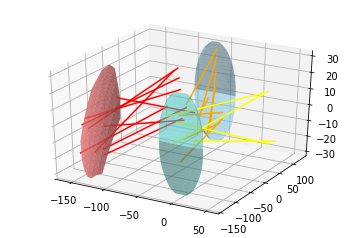

In [12]:
pl3dsurf = pl.figure().gca(projection = '3d')
#E10
pl3dsurf.plot_trisurf(X11,Y11,Z11,linewidth = .2, antialiased=True, color = 'lightcoral',alpha=0.7)#GLOBAL
pl3dsurf.plot_trisurf(X12,Y12,Z12,linewidth = .2, antialiased=True, color = 'lightcoral',alpha=0.7)#GLOBAL
for i in range (0,len(p10)):
    x,y,z = ML(p10[i], v10[i], 200) #global
    pl3dsurf.plot(x,y,z, color = 'red')
#E8
pl3dsurf.plot_trisurf(X9,Y9,Z9, linewidth = .2, antialiased=True, color = 'skyblue',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X10,Y10,Z10, linewidth = .2, antialiased=True, color = 'skyblue',alpha=0.7) #GLOBAL

p810,v810 = RT(points810,vects810,thet6,origin8,thetG,originG)
for i in range (0,len(p810)):
    x,y,z = ML(p810[i], v810[i], 200)
    pl3dsurf.plot(x,y,z, color = 'Orange')
#ellipse3
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'mediumturquoise',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'mediumturquoise',alpha=0.7) #GLOBAL

p38,v38 = RT(points38,vects38,thet,origin3,thet,originG)
for i in range (0,len(p38)):
    x,y,z = ML(p38[i], v38[i], 200)
    pl3dsurf.plot(x,y,z, color = 'yellow')
pl.show()

In [13]:
#reflection off of E2 from E3
center2,range2 = xrangeGL6(X3i,Y3i,Z3i,X4i,Y4i,Z4i,origin2,thet)
sp3,v3 = RT(points38,vects38,thet,origin3,thet,origin2)
points23,vects23 = RSEPCNi(coeffellipse,sp3,v3,range2,center2)

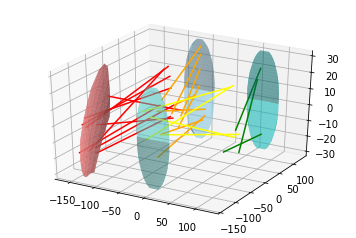

In [14]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X11,Y11,Z11,linewidth = .2, antialiased=True, color = 'lightcoral',alpha=0.7)#GLOBAL
pl3dsurf.plot_trisurf(X12,Y12,Z12,linewidth = .2, antialiased=True, color = 'lightcoral',alpha=0.7)#GLOBAL
for i in range (0,len(p10)):
    x,y,z = ML(p10[i], v10[i], 200) #global
    pl3dsurf.plot(x,y,z, color = 'red')
#E8
pl3dsurf.plot_trisurf(X9,Y9,Z9, linewidth = .2, antialiased=True, color = 'skyblue',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X10,Y10,Z10, linewidth = .2, antialiased=True, color = 'skyblue',alpha=0.7) #GLOBAL

p810,v810 = RT(points810,vects810,thet6,origin8,thetG,originG)
for i in range (0,len(p810)):
    x,y,z = ML(p810[i], v810[i], 200)
    pl3dsurf.plot(x,y,z, color = 'Orange')
#ellipse3
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'mediumturquoise',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'mediumturquoise',alpha=0.7) #GLOBAL

p38,v38 = RT(points38,vects38,thet,origin3,thet,originG)
for i in range (0,len(p38)):
    x,y,z = ML(p38[i], v38[i], 200)
    pl3dsurf.plot(x,y,z, color = 'yellow')
#ellipse 2
pl3dsurf.plot_trisurf(X3i,Y3i,Z3i, linewidth = .2, antialiased=True, color = 'c',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X4i,Y4i,Z4i, linewidth = .2, antialiased=True, color = 'c',alpha=0.7) #GLOBAL

p23,v23 = RT(points23,vects23,thet,origin2,thet,originG)
for i in range (0,len(p23)):
    x,y,z = ML(p23[i], v23[i], 200)
    pl3dsurf.plot(x,y,z, color = 'green')
pl.show()

In [15]:
origin5 = [128.3,-120.501,0] # (ellipse5)
origin6 = [128.3,120.501,0] # (ellipse6)
#ellipse 5&6
X5,Y5,Z5,X6,Y6,Z6 = FTSEC(50,np.pi/8, coeffellipse56, 350, 'pos')
X5n,Y5n,Z5n,X6n,Y6n,Z6n = FTSEC(50,np.pi/8, coeffellipse56, 350, 'neg')

#ellipse5
Xset5, Yset5, Zset5= transformLG(X5,Y5,Z5,origin5,thet5)
Xset6, Yset6, Zset6 = transformLG(X6,Y6,Z6,origin5,thet5)

X5,Y5,Z5 = SR2(32.07, Xset5,Yset5,Zset5, origin5)
X6,Y6,Z6 = SR2(32.07, Xset6, Yset6, Zset6, origin5)

#ellipse6
Xset5n,Yset5n,Zset5n = transformLG(X5n,Y5n,Z5n,origin6,thet6)
Xset6n,Yset6n,Zset6n = transformLG(X6n,Y6n,Z6n,origin6,thet6)

X5n,Y5n,Z5n = SR2(32.07,Xset5n,Yset5n,Zset5n,origin6)
X6n,Y6n,Z6n = SR2(32.07,Xset6n,Yset6n,Zset6n,origin6)

In [16]:
#reflection off of E6 from E2
xcenter6,xrange6 = xrangeGL6(X5n,Y5n,Z5n,X6n,Y6n,Z6n,origin6,thet6)
sp2,v2 = RT(points23,vects23,thet,origin2,thet6,origin6)
points62,vects62 = RSEPCNi(coeffellipse56,sp2,v2,xrange6,xcenter6)

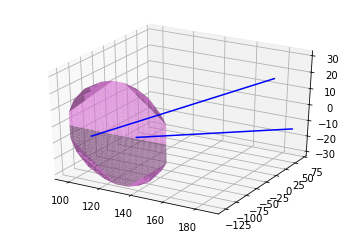

In [17]:
pl3dsurf = pl.figure().gca(projection = '3d')
#ellipse6
pl3dsurf.plot_trisurf(X5n,Y5n,Z5n, linewidth = .2, antialiased=True, color = 'orchid',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X6n,Y6n,Z6n, linewidth = .2, antialiased=True, color = 'orchid',alpha=0.7) #GLOBAL

p62,v62 = RT(points62,vects62,thet6,origin6,thet,originG)
for i in range (0,len(p62)):
    x,y,z = ML(p62[i], v62[i], 200)
    pl3dsurf.plot(x,y,z, color = 'blue')
pl.show()

In [18]:
thet7 = [0,-.319422,(np.pi-1.3106)] #I THINK 
coeffellipse7 = [164.645,99.8,130.95]
origin7 = [160.375,-7.5,40]

X7i,Y7i,Z7i,X8i,Y8i,Z8i = FTSEC(50,np.pi*2, coeffellipse7, 329.29, 'pos')
Xset7,Yset7,Zset7 = transformLG(X7i,Y7i,Z7i,origin7,thet7)
Xset8,Yset8,Zset8 = transformLG(X8i,Y8i,Z8i,origin7,thet7)
Ecenter = [192.45,0,0]
X7,Y7,Z7 = SR7(32.07,Xset7, Yset7, Zset7, Ecenter)
X8,Y8,Z8 = SR7(32.07,Xset8, Yset8, Zset8, Ecenter)
xcenter7,xrange7 = xrangeGL6(X7,Y7,Z7,X8,Y8,Z8,origin7,thet7)
X7t,Y7t,Z7t = SR103di(xrange7,X7,Y7,Z7,xcenter7)
X8t,Y8t,Z8t = SR103di(xrange7,X7,Y7,Z7,xcenter7)

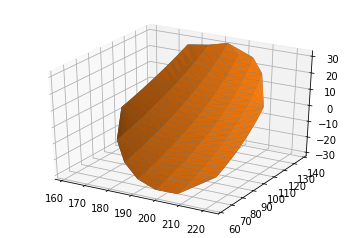

In [19]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X7,Y7,Z7)
pl3dsurf.plot_trisurf(X8,Y8,Z8)
pl.show()

In [20]:
sp6,v6 = RT(points62,vects62,thet6,origin6,thet7,origin7)
points76,vects76 = RSEPCNi(coeffellipse7,sp6,v6,xrange7,xcenter7)

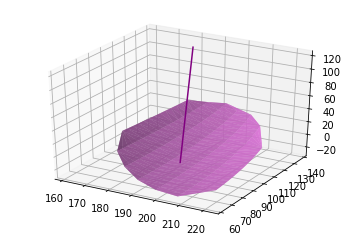

In [21]:
pl3dsurf = pl.figure().gca(projection = '3d')
#ellipse7
pl3dsurf.plot_trisurf(X7,Y7,Z7, linewidth = .2, antialiased=True, color = 'orchid',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X8,Y8,Z8, linewidth = .2, antialiased=True, color = 'orchid',alpha=0.7) #GLOBAL

p76,v76 = RT(points76,vects76,thet7,origin7,thet,originG)
for i in range (0,len(p76)):
    x,y,z = ML(p76[i], v76[i], 200)
    pl3dsurf.plot(x,y,z, color = 'purple')
pl.show()

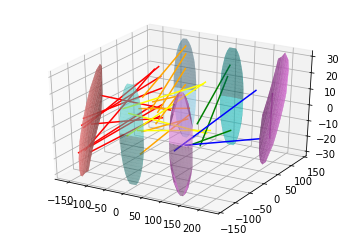

In [22]:
#SO TOTAL PATH 1
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X11,Y11,Z11,linewidth = .2, antialiased=True, color = 'lightcoral',alpha=0.7)#GLOBAL
pl3dsurf.plot_trisurf(X12,Y12,Z12,linewidth = .2, antialiased=True, color = 'lightcoral',alpha=0.7)#GLOBAL
for i in range (0,len(p10)):
    x,y,z = ML(p10[i], v10[i], 200) #global
    pl3dsurf.plot(x,y,z, color = 'red')
#E8
pl3dsurf.plot_trisurf(X9,Y9,Z9, linewidth = .2, antialiased=True, color = 'skyblue',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X10,Y10,Z10, linewidth = .2, antialiased=True, color = 'skyblue',alpha=0.7) #GLOBAL

p810,v810 = RT(points810,vects810,thet6,origin8,thetG,originG)
for i in range (0,len(p810)):
    x,y,z = ML(p810[i], v810[i], 200)
    pl3dsurf.plot(x,y,z, color = 'Orange')
#ellipse3
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'mediumturquoise',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'mediumturquoise',alpha=0.7) #GLOBAL

p38,v38 = RT(points38,vects38,thet,origin3,thet,originG)
for i in range (0,len(p38)):
    x,y,z = ML(p38[i], v38[i], 200)
    pl3dsurf.plot(x,y,z, color = 'yellow')
#ellipse 2
pl3dsurf.plot_trisurf(X3i,Y3i,Z3i, linewidth = .2, antialiased=True, color = 'c',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X4i,Y4i,Z4i, linewidth = .2, antialiased=True, color = 'c',alpha=0.7) #GLOBAL

p23,v23 = RT(points23,vects23,thet,origin2,thet,originG)
for i in range (0,len(p23)):
    x,y,z = ML(p23[i], v23[i], 200)
    pl3dsurf.plot(x,y,z, color = 'green')

#ellipse6
pl3dsurf.plot_trisurf(X5n,Y5n,Z5n, linewidth = .2, antialiased=True, color = 'orchid',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X6n,Y6n,Z6n, linewidth = .2, antialiased=True, color = 'orchid',alpha=0.7) #GLOBAL

p62,v62 = RT(points62,vects62,thet6,origin6,thet,originG)
for i in range (0,len(p62)):
    x,y,z = ML(p62[i], v62[i], 200)
    pl3dsurf.plot(x,y,z, color = 'blue')

#ellipse7
pl3dsurf.plot_trisurf(X7,Y7,Z7, linewidth = .2, antialiased=True, color = 'orchid',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X8,Y8,Z8, linewidth = .2, antialiased=True, color = 'orchid',alpha=0.7) #GLOBAL

p76,v76 = RT(points76,vects76,thet7,origin7,thet,originG)
for i in range (0,len(p76)):
    x,y,z = ML(p76[i], v76[i], 40)
    pl3dsurf.plot(x,y,z, color = 'purple')
pl.show()

In [ ]:
#to be deleted. just testing
originG = [0,0,0] # the global origin
thetG = [0,0,0] # rotation with respect to itself aka 0,0,0
origin10 = [-96.225,7.5,-40]
coeffellipse7 = [164.645,99.8,130.95] #for ellipse 7
thet10 = [0,.310422,-1.3106] #negative of thet7?
X11i,Y11i,Z11i,X12i,Y12i,Z12i = FTSEC(50,np.pi*2, coeffellipse7, 329.29, 'pos') #LOCAL
Xset11,Yset11,Zset11 = transformLG(X11i,Y11i,Z11i,origin10,thet10) #GLOBAL
Xset12,Yset12,Zset12 = transformLG(X12i,Y12i,Z12i,origin10,thet10) #GLOBAL
Ecenter = [-128.3,0,0]
X11,Y11,Z11 = SR10(32.07, Xset11,Yset11,Zset11, Ecenter) #SELECTED GLOBAL
X12,Y12,Z12 = SR10(32.07, Xset12,Yset12,Zset12, Ecenter) #SELECTED GLOBAL
center10,range10, = xrangeGL6(X11,Y11,Z11,X12,Y12,Z12,origin10,thet10)
X11t,Y11t,Z11t = SR103di(range10,X11i,Y11i,Z11i,center10)
X12t,Y12t,Z12t = SR103di(range10,X12i,Y12i,Z12i,center10)
#source 1 being reflected off of E10
originL = [0,0,0] #locally (or the global origin)
thetL = [0,0,0]

#creating the source (around the focus of E8) LOCALLY 
sourcepointorigin = [-130.95,0,0] #locally 
#sourcethet = [-np.pi/2,0,-.310422] #locally
sourcethet = [0,0,0]
sourcepoints = specsource(8,sourcepointorigin,sourcethet) #local

#source point and vector!
sourcep1, sv1 = FS(100,sourcepoints, sourcethet,origin10) #local
#Reflection off of E10
points10, vects10 = RSEPCNi(coeffellipse7,sourcep1,sv1, range10,center10) #local
#sourcep1[1]
#a,b = REPCNi(coeffellipse7,sourcep1[3],sv1[3])
#ellipse 8&9
X9i,Y9i,Z9i,X10i,Y10i,Z10i = FTSEC(50,np.pi/8, coeffellipse56, 150, 'pos')
X9n,Y9n,Z9n,X10n,Y10n,Z10n = FTSEC(50,np.pi/8, coeffellipse56, 150, 'neg')

#ellipse 8
Xset9,Yset9,Zset9 = transformLG(X9i,Y9i,Z9i,origin8,thet6)
Xset10,Yset10,Zset10 = transformLG(X10i,Y10i,Z10i,origin8,thet6)

X9,Y9,Z9 = SR2(32.07, Xset9,Yset9,Zset9, origin8)
X10,Y10,Z10 = SR2(32.07, Xset10, Yset10, Zset10, origin8)
center8,range8 = xrangeGL6(X9,Y9,Z9,X10,Y10,Z10,origin8,thet6)


sp10,v10 = RT(points10, vects10,thet10,origin10,thet6,origin8)
points810,vects810 = RSEPCNi(coeffellipse56,sp10,v10,range8,center8)
print(points810)

#NOW JUST USING SIGN TO MEAN IF POS OR NEG SIDE OF X
pli1 = [-5.001,-1,1] #focus of ellipse (starting point of ray)
v1 = [-2,.1,1] # vector of point
coeffellipse1 = [np.sqrt(50),5,5] #a,b,c of ellipse that is rotated around x
Gint, Gvect = REPCNi(coeffellipse1,pli1,v1)
X,Y,Z,X1,Y1,Z1 = FTSEC(50,np.pi*2, coeffellipse1, 14.142, 'pos') 
pl3d = pl.figure().gca(projection = '3d')
pl3d.plot(X,Y,Z,linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)#LOCAL
pl3d.plot(X1,Y1,Z1,linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)#LOCAL
#x,y,z = ML(pointint, Npos, 10) 
#pl3d.plot(x,y,z, color = 'black') #normal 1
#x,y,z = ML(pointintneg,Nneg,10)
#pl3d.plot(x,y,z, color = 'black')
f2 = [-5,0,0] #focus2
x,y,z = ML(f2,v1,5)
pl3d.plot(x,y,z,color = 'red') #initial ray
#pl3d.scatter([pointint[0]],[pointint[1]],[pointint[2]], color = 'orange')
#x,y,z = ML(pointint,VectL2,10)
#pl3d.plot(x,y,z, color = 'orange') #reflected
#pl3d.scatter([pointintneg[0]],[pointintneg[1]],[pointintneg[2]], color = 'yellow')
#x,y,z = ML(pointintneg,VectL2neg,10)
#pl3d.plot(x,y,z, color = 'yellow') #reflected
pl3d.scatter([Gint[0]],[Gint[1]],[Gint[2]], color = 'yellow')
x,y,z = ML(Gint,Gvect,10)
pl3d.plot(x,y,z, color = 'yellow')
pl.show()
#FIGURE OUT WHEN YOU NEED INTPOS VS INT NEG OK I THINK IT WORKS OMG